In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [15]:
data= pd.read_csv("divvy_trip_data.csv")

In [ ]:
# Check the first few rows of the dataset
data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:05,2023-11-30 22:13:27,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,-87.624082,41.949473,-87.646453,member
1,6322270563BF5470,electric_bike,2023-11-03 09:44:02,2023-11-03 10:17:15,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,-87.650035,41.952833,-87.649993,member
2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:44,2023-11-30 11:40:08,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,-87.628694,41.897448,-87.628722,member
3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:45,2023-11-08 10:27:05,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member
4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:25,2023-11-03 16:54:25,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member


In [17]:
# Get the basic info on the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5933712 entries, 0 to 5933711
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 588.5+ MB


In [18]:
# Check for missing values
data.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1079270
start_station_id      1079270
end_station_name      1112056
end_station_id        1112056
start_lat                   0
start_lng                   0
end_lat                  7417
end_lng                  7417
member_casual               0
dtype: int64

In [19]:
# Drop unwanted columns
columns_to_drop = ['ride_id', 'start_station_id', 'end_station_id']
data.drop(columns=columns_to_drop, inplace=True)

In [22]:
# Convert 'started_at' and 'ended_at' to datetime with error handling
data['started_at'] = pd.to_datetime(data['started_at'], errors='coerce')
data['ended_at'] = pd.to_datetime(data['ended_at'], errors='coerce')
# Drop rows with NaT values in date columns
data = data.dropna(subset=['started_at', 'ended_at'])

In [ ]:
# Fill the missing values'
data['start_station_name'].fillna('Unknown', inplace=True)
data['end_station_name'].fillna('Unknown', inplace=True)
data['end_lat'].fillna(data['end_lat'].mean(), inplace=True)
data['end_lng'].fillna(data['end_lng'].mean(), inplace=True)

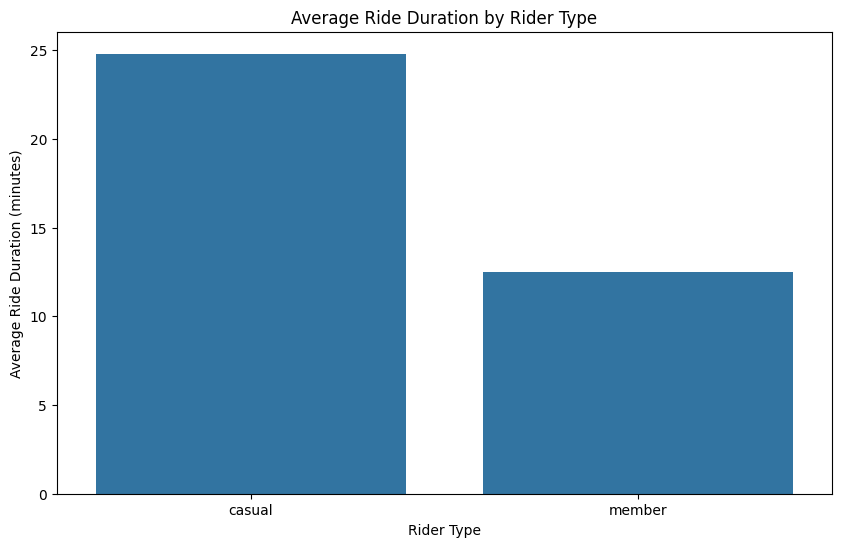

In [35]:
# Create new columns for analysis
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60  # Duration in minutes

# Calculate average ride duration for each rider type
avg_ride_duration = data.groupby('member_casual')['ride_duration'].mean().reset_index()

# Bar plot for average ride duration by rider type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_ride_duration, x='member_casual', y='ride_duration')
plt.title('Average Ride Duration by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()


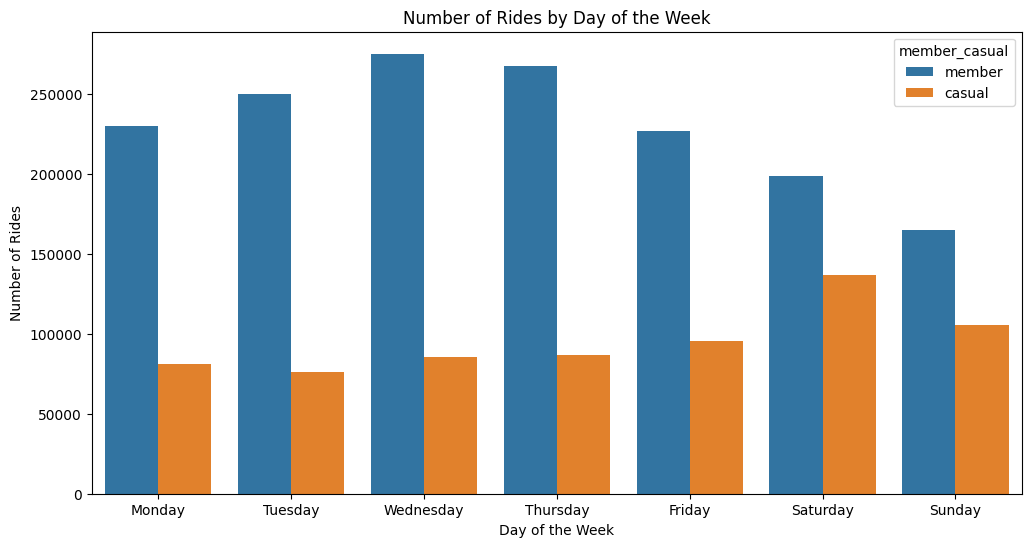

In [27]:
# Count of rides by day of the week for each rider type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='day_of_week', hue='member_casual', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

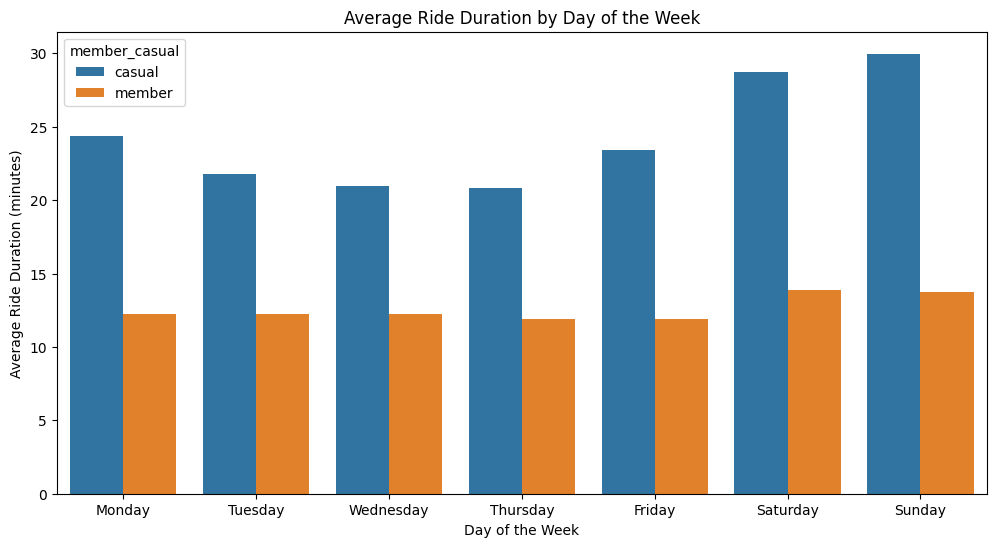

In [28]:
# Average ride duration by day of the week
avg_duration = data.groupby(['day_of_week', 'member_casual'])['ride_duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='day_of_week', y='ride_duration', hue='member_casual', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Ride Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()

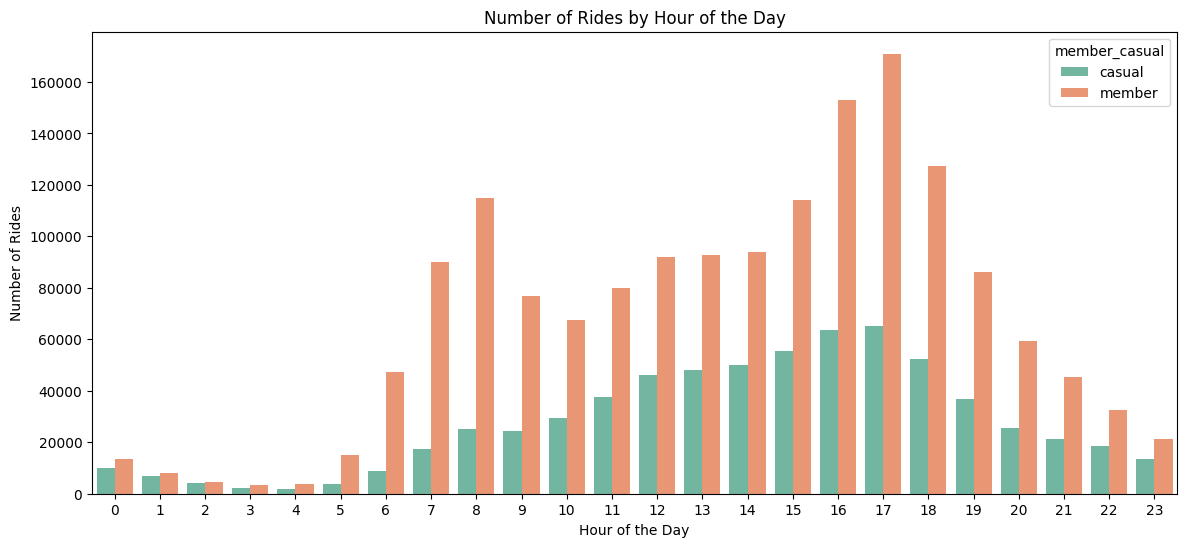

In [30]:
# Create a bar plot for the number of rides by hour of the day for each rider type
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='hour_of_day', hue='member_casual', palette='Set2')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.show()

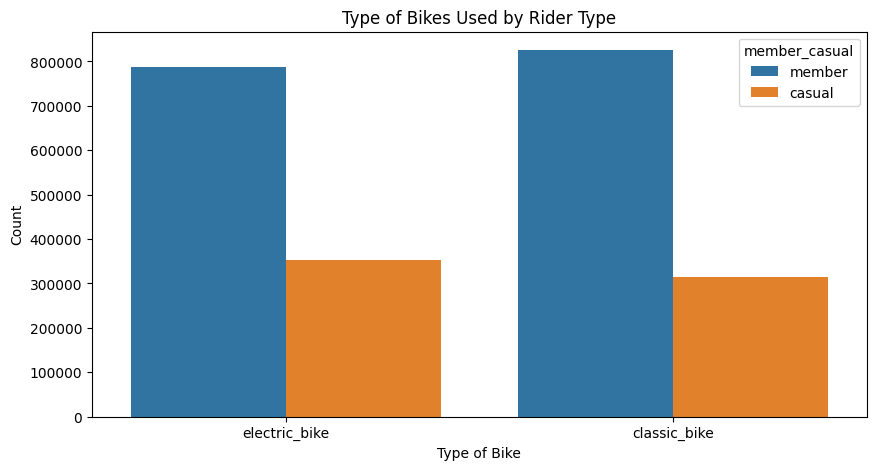

In [31]:
# Type of bikes used by rider type
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='rideable_type', hue='member_casual')
plt.title('Type of Bikes Used by Rider Type')
plt.xlabel('Type of Bike')
plt.ylabel('Count')
plt.show()

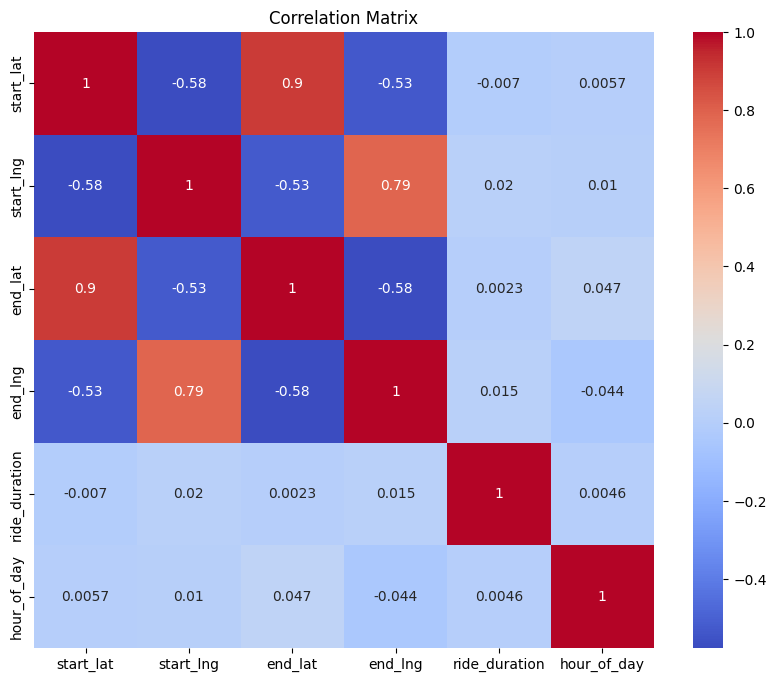

In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()